# **Assignment-2 : KNN Classification**

## Group 5:
Furqaan Khan - 1319172

Vered Raz - 1316418

Prachiti Bahaduri - 1317686

Harsh Dalwadi - 1309370

Himani Parikh - 1322085

# ***Question***:

Suppose that you are the administrator of a university department and you want to determine
each applicant&#39;s chance of admission based on their results on two exams. You have historical
data from previous applicants that you can use as a training, where the first and second columns
are the scores for first and second exam, respectively and the third column shows the admission
result:
1=Admitted, 0=not-admitted.

Predict the result for the following students using KNN algorithm. Compare your prediction with
true ones in the third column. Provide the confusion matrix, sensitivity, specificity, total accuracy,
F1-score, Roc curve, and area under curve

Mounted at /content/drive

 **** Results with 3 Neighbors and Distance Formula euclidean: **** 
Accuracy score: 0.90
Confusion Matrix: 
[[9 1]
 [1 9]]


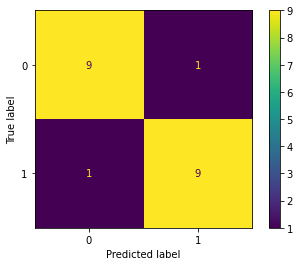


Sensitivity :  0.9
Specificity :  0.9
F1-score    :  0.9



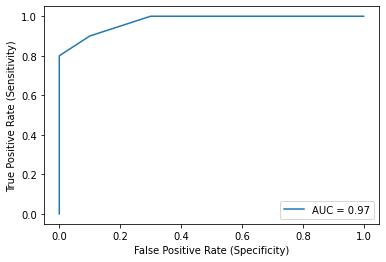


 **** Results with 3 Neighbors and Distance Formula manhattan: **** 
Accuracy score: 0.90
Confusion Matrix: 
[[9 1]
 [1 9]]


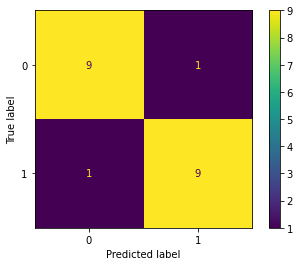


Sensitivity :  0.9
Specificity :  0.9
F1-score    :  0.9



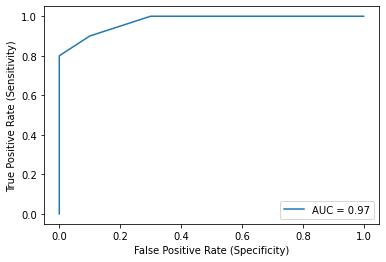


 **** Results with 5 Neighbors and Distance Formula euclidean: **** 
Accuracy score: 0.90
Confusion Matrix: 
[[9 1]
 [1 9]]


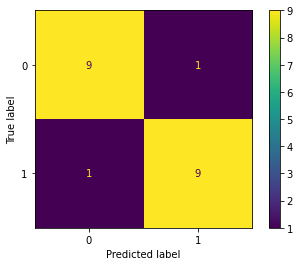


Sensitivity :  0.9
Specificity :  0.9
F1-score    :  0.9



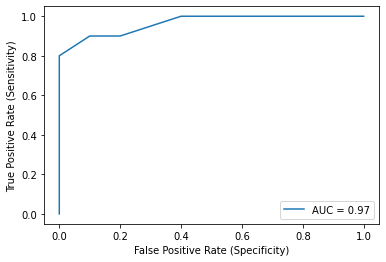


 **** Results with 5 Neighbors and Distance Formula manhattan: **** 
Accuracy score: 0.90
Confusion Matrix: 
[[9 1]
 [1 9]]


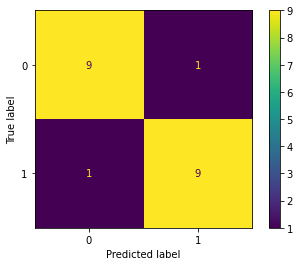


Sensitivity :  0.9
Specificity :  0.9
F1-score    :  0.9



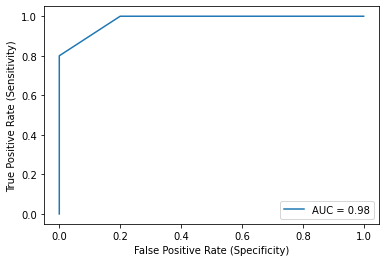


 **** Results with 7 Neighbors and Distance Formula euclidean: **** 
Accuracy score: 0.90
Confusion Matrix: 
[[9 1]
 [1 9]]


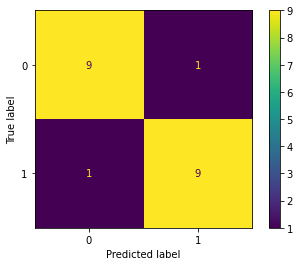


Sensitivity :  0.9
Specificity :  0.9
F1-score    :  0.9



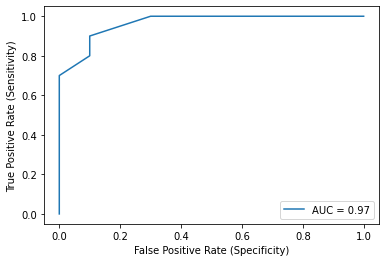


 **** Results with 7 Neighbors and Distance Formula manhattan: **** 
Accuracy score: 0.90
Confusion Matrix: 
[[9 1]
 [1 9]]


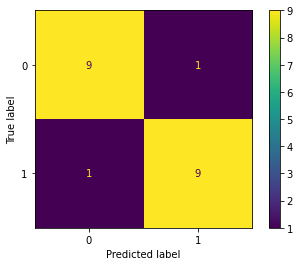


Sensitivity :  0.9
Specificity :  0.9
F1-score    :  0.9



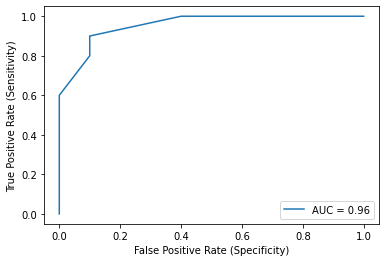

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Set the working directory
os.chdir('/Users/furqaankhan/Desktop/Data')

# Load dataset
training_set = pd.read_csv('applicants_train.csv', sep=',', header=None)
testing_set = pd.read_csv('applicants_test.csv', sep=',', header=None)

# Separate the Label from the Features
X_train = training_set.iloc[:, :-1]
y_train = training_set.iloc[:, -1]

X_test = testing_set.iloc[:, :-1]
y_test = testing_set.iloc[:, -1]

# Prepare loop iterations with model parameters
parameters = [[3, 'euclidean'], [3, 'manhattan'], [5, 'euclidean'],
              [5, 'manhattan'], [7, 'euclidean'], [7, 'manhattan']]

for p in parameters:

    print()

    # Print title
    print(f" **** Results with {p[0]} Neighbors and Distance Formula {p[1]}: **** ")

    # Instantiate KNN classifier algorithm
    knn = KNeighborsClassifier(n_neighbors=p[0], metric=p[1])

    # Fit the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score: {accuracy:.2f}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: \n{cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    print()

    # Sensitivity 
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity )
    
    # Specificity
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity)
    
    # F1-score
    fscore = cm[0,0]/(cm[0,0]+0.5*(cm[1,0]+cm[0,1]))
    print('F1-score    : ', fscore)

    print()

    # Calculate ROC curve and AUC
    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.xlabel('False Positive Rate (Specificity)')
    plt.legend(loc='lower right')
    plt.show()